*** Part 1: Analyzing Best-Seller Trends Across Product Categories ***

1/ Crosstab Analysis:
    Create a crosstab between the product category and the isBestSeller status.
    Are there categories where being a best-seller is more prevalent?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# note: when there is a % it is not really python, in this example we tell the system not to open another window when doing 
# matplotlib

In [2]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [18]:
# Generating a crosstab for 'category' and 'isBestSeller'
crosstab_result = pd.crosstab(df['category'], df['isBestSeller'])

mask = (crosstab_result[True] > crosstab_result[False]) # need to check when True is > False

display(crosstab_result[mask]) # JAV=> shows none has True (bestSeller) > False
crosstab_result

isBestSeller,False,True
category,,


isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


2/ Statistical Tests:
    Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
    Compute Cramér's V to understand the strength of association between best-seller status and category.

In [19]:
from scipy.stats import chi2_contingency

# Chi-square test for 'category' and 'isBestSeller'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_result) # this function returns 4 values=> we need the 2 underscores

chi2_statistic, chi2_p_value # JAV, the p value is << 0.5 => there is a relationship for sure ! 

(36540.20270061387, 0.0)

In [20]:
# Cramér s V
from scipy.stats.contingency import association

# Computing the association between variables in 'crosstab_result' using the "cramer" method
association(crosstab_result, method="cramer") # JAV: 0.122... there is an association but weak...


0.1222829439760564

3/ Visualizations:
Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

<Axes: xlabel='category'>

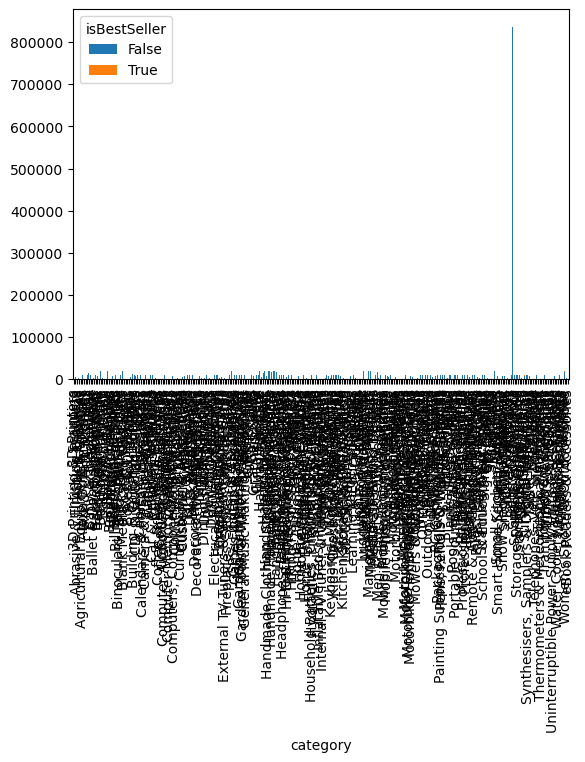

In [21]:
# Plotting a stacked bar chart for the 'crosstab_result' data
crosstab_result.plot(kind="bar", stacked=True)

<Axes: xlabel='category'>

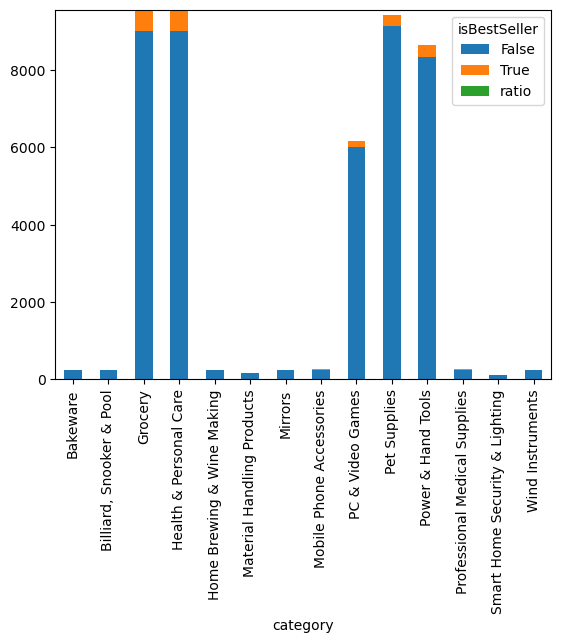

In [44]:
test = crosstab_result
test['ratio']=test[True]/test[False]
to_see= test[test['ratio'] > 0.025]
to_see.plot(kind="bar", stacked=True)

*** Part 2: Exploring Product Prices and Ratings Across Categories and Brand ***

** 0/ Preliminary Step: Remove outliers in product prices. **
For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times 
the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next
steps will be done with the dataframe without outliers.

In [45]:
#Lesson function
def tukeys_test_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

In [48]:
# My function to remove the outliers
def removing_tukeys_outliers(data,column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for the outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify the outliers
    not_outliers = data[(data[column] > lower_bound) & (data[column] < upper_bound)]
    
    return not_outliers

In [50]:
new_df=removing_tukeys_outliers(df,'price')
new_df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


** 1/ Violin Plots: **
Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

In [76]:
new_df['category'].value_counts()[:20] # select more than Baby = 14883

filtered_cat= list(new_df['category'].value_counts()[:20].index)
#new_df.loc[filtered_cat]
mask = new_df['category'].isin(filtered_cat)



<Axes: xlabel='price', ylabel='category'>

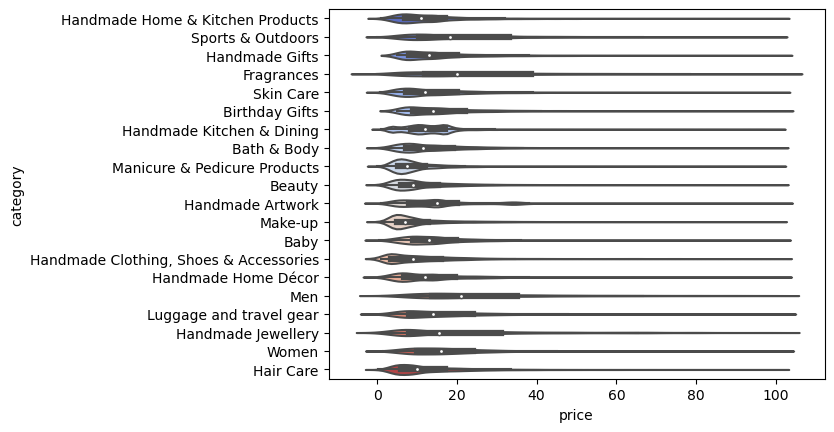

In [95]:
# Plotting a violin plot to visualize the distribution of 'Price' for each product 'category', using the "coolwarm" color palette
sns.violinplot(data=new_df[mask], x='price', y='category', palette="coolwarm")

In [88]:
new_df.groupby(['category'])['price'].median().sort_values(ascending = False) # JAV: desktop PCs have the highest median price

category
Desktop PCs              74.00
Boxing Shoes             69.79
Tablets                  69.00
Graphics Cards           68.54
Motherboards             67.92
                         ...  
Adapters                  7.05
Make-up                   7.00
Signs & Plaques           6.99
Arts & Crafts             5.99
Office Paper Products     4.37
Name: price, Length: 296, dtype: float64

** 2/ Bar Charts: **
Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

In [89]:
#filtering the top 10 categories
filtered_cat2= list(new_df['category'].value_counts()[:10].index)
mask_top10 = new_df['category'].isin(filtered_cat2)


C:\Users\Javier\AppData\Local\Temp\ipykernel_25344\1243543022.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(data=new_df[mask_top10], x='price', y='category', palette="coolwarm", ci = False) # removed the ci


<Axes: xlabel='price', ylabel='category'>

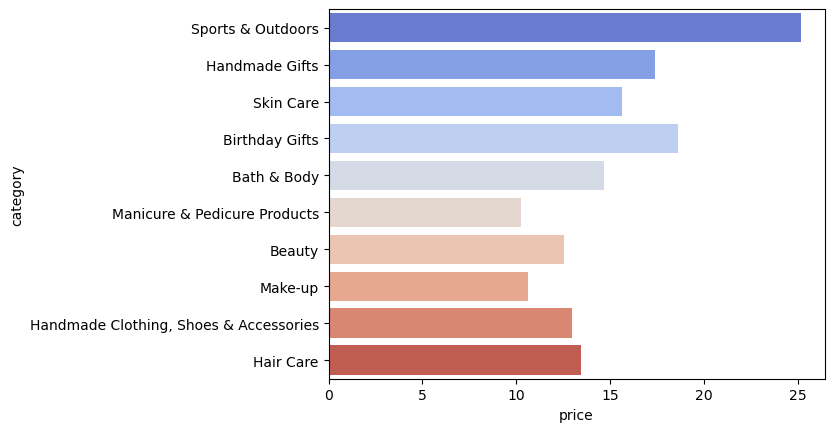

In [106]:
# Plotting a bar plot to visualize the average 'price' for the top 10 product 'category', using the "coolwarm" color palette
sns.barplot(data=new_df[mask_top10], x='price', y='category', palette="coolwarm", ci = False) # removed the ci

In [91]:
new_df.groupby(['category'])['price'].mean().sort_values(ascending = False) # Motherboards category has the higher mean

category
Motherboards             68.772432
Boxing Shoes             67.417803
Desktop PCs              66.915562
Tablets                  66.552971
Graphics Cards           65.103509
                           ...    
Bedding Accessories       8.835220
Adapters                  8.750197
Signs & Plaques           8.210513
Arts & Crafts             8.006540
Office Paper Products     6.876369
Name: price, Length: 296, dtype: float64

** 3/ Box Plots: **
Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

<Axes: xlabel='stars', ylabel='category'>

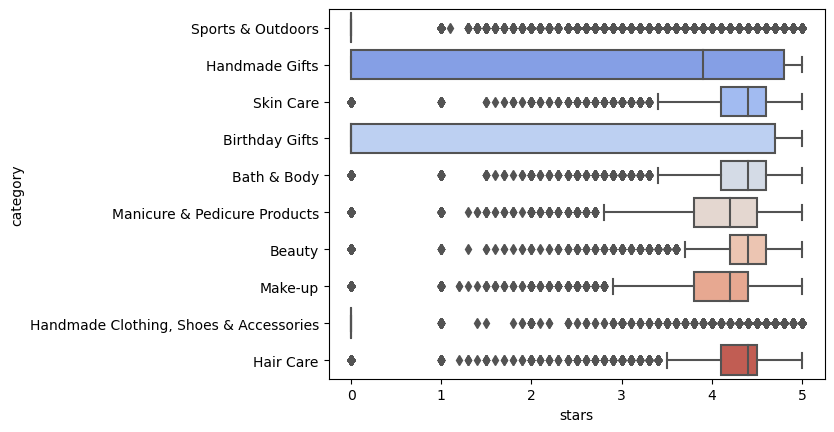

In [110]:
# Plotting a box plot to visualize the spread and remnants outliers of 'price' for each product 'category', using the "coolwarm" color palette
sns.boxplot(data=new_df[mask_top10], x='stars', y='category', palette="coolwarm")

In [107]:
new_df.groupby(['category'])['stars'].median().sort_values(ascending = False) # Computer Memory has the higher median rating

category
Computer Memory                 4.7
Building & Construction Toys    4.6
Office Paper Products           4.6
Luxury Food & Drink             4.6
Kids' Play Figures              4.6
                               ... 
Hockey Shoes                    0.0
Hi-Fi Receivers & Separates     0.0
Handmade Kitchen & Dining       0.0
Handmade Jewellery              0.0
eBook Readers & Accessories     0.0
Name: stars, Length: 296, dtype: float64

*** Part 3: Investigating the Interplay Between Product Prices and Ratings ***

** 1/ Correlation Coefficients: **
Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [108]:
# Calculating the Pearson correlation coefficient between 'price' and 'stars' columns
correlation = new_df['price'].corr(df['stars'])

# Calculating the Spearman rank correlation between 'price' and 'stars' columns 
correlation2 = new_df['price'].corr(df['stars'], method='spearman')
correlation, correlation2 # Not really a correlation, the values are close to 0

(-0.0776729987818137, -0.06679697280768314)

** 2/ Visualizations: **
Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

<Axes: xlabel='stars', ylabel='price'>

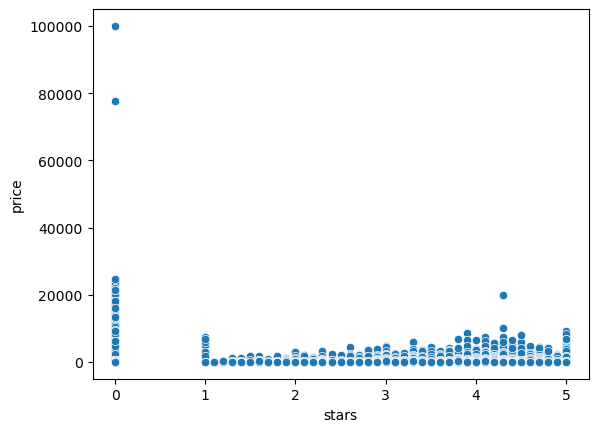

In [109]:
# Plotting a scatter plot to visualize the relationship between 'price' and 'stars'
sns.scatterplot(data=df, x='stars', y='price')  # the zero rating are affecting everything

In [116]:
new_df_numerical= new_df.select_dtypes("number")
new_df_numerical

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0
...,...,...,...,...,...
2443646,2828589,0.0,0,22.34,0
2443647,2828590,0.0,0,97.99,0
2443648,2828591,0.0,0,52.99,0
2443649,2828592,4.3,404,79.99,0


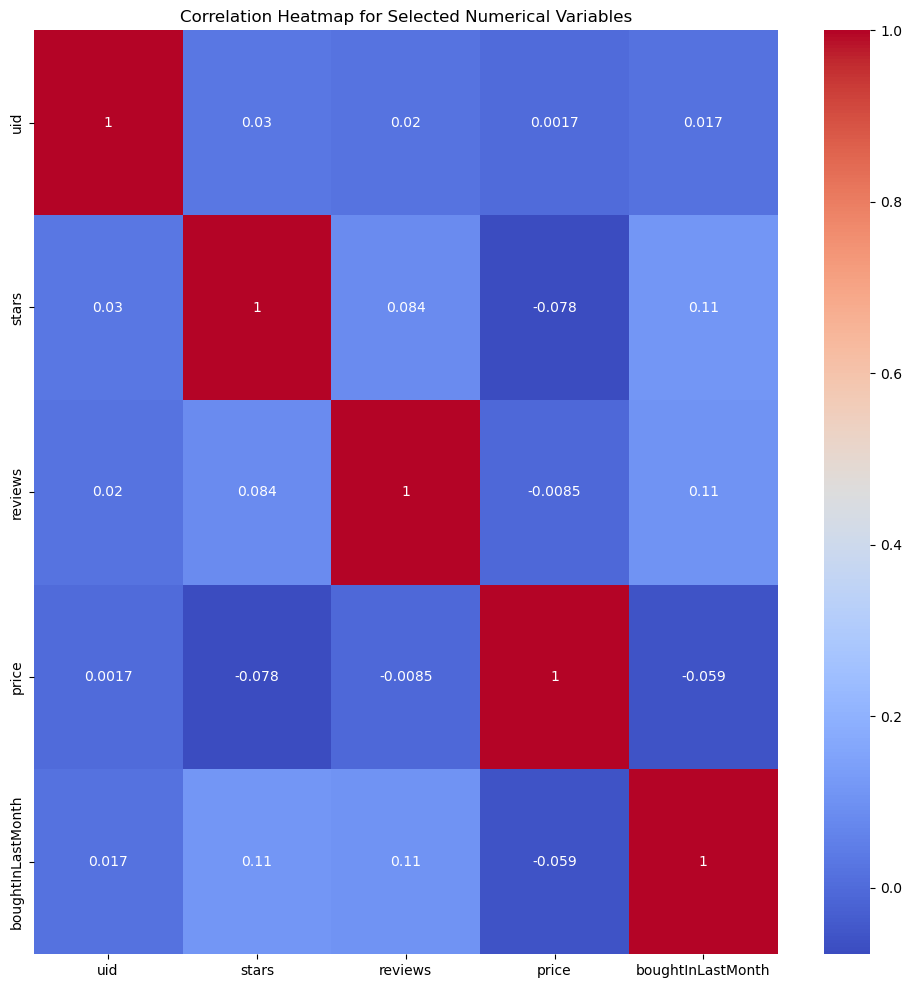

In [118]:
spearman_correlations= new_df_numerical.corrwith(df['price'], method='spearman')

correlation_matrix = new_df_numerical[spearman_correlations.index].corr() # here I can filter more


# Setting up the matplotlib figure with an appropriate size
plt.figure(figsize=(12, 12)) # changed the size so I could see better

# Drawing the heatmap for the numerical columns
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()  # No correlations!

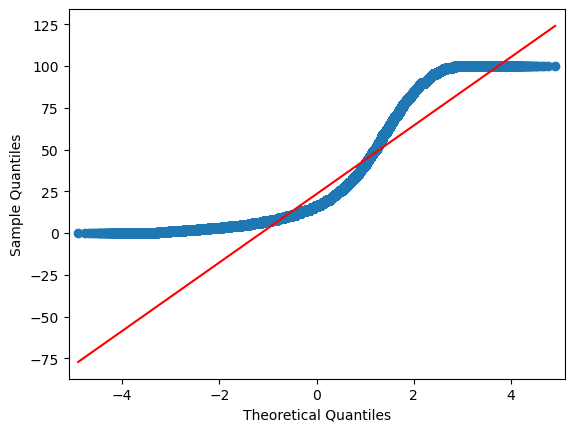

In [119]:
import statsmodels.api as sm

# Generating a Q-Q plot for 'price' to check if its distribution follows a normal distribution
sm.qqplot(new_df['price'], line='s'); # not normal distribution

